# DNSC-6211 Team Project - Group2

* Soomin Park
* Ziqing Zhu
* Tianweibao Zheng
* Junfei Zheng
* Amit Nayak

# 1. Introduction

The 2016 presidential election will go down as one of the most interesting presidential elections in history. Behind all the shenanigans that went on with the debates and each candidate’s issues and debacles, none of the polls or remarkable websites such as FiveThirtyEight had predicted a Trump victory. 
After the election, it seems that American people have been feeling much more negatively about the election results than ever before. We can clearly see that from the keyword analysis using Word Cloud from the recent tweets that we suggest below. 

## Twitter Keyword Analysis

### 1) The requirements before running the code

In [ ]:
# Files needed in the current directory: 'authdata.csv', font('CabinSketch-Bold.ttf')

# Libraries installation: All libraries must be installed before running the codes below (Please run these in your terminal, not here)
!pip easy_install tweepy
!pip install monkeylearn
!pip install wordcloud y
!conda install -c https://conda.anaconda.org/amueller wordcloud

### 2) Functions

* Authentification 
* Data acquision from Twitter using Tweepy, a Twitter API library
* Tweets data cleansing for better analysis : removing puctuation/stop words/URLs, excluding re-tweets, and lowercase transformation
* Extracting important keywords from the tweets using Monkeylearn API, a cloud based text mining and semantinc processing service. 
* Visualizing the keywords using Word Clouds 

In [17]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re

# Functions 
def getAuthData(filename):
    # Reads Authentification info from a file and return it as a list
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)
    authdata = {}   
    for element in your_list:
        authdata[element[0]] = element[1]
    return authdata


def getTwitterData(searchTerm, searchCount, startdate, enddate):
    # Gets tweet data that was created between startdate and enddate and that matches the query(searchTerm) as many as searchCount from the twitter server, 
    #      and extracts only the texts from the statuses and combine them into a list.
    searched_results = []
    for tweet in tweepy.Cursor(api.search, q=searchTerm, include_entities=True, since=startdate, until=enddate, 
                               language='en', wait_on_rate_limit=True, wait_on_rate_limit_notify=True).items(searchCount):
        searched_results.append(tweet)
    tweetTexts = []
    # Exclude Retweets
    for tweet in searched_results:
        if not tweet.retweeted and 'RT @' not in tweet.text:
            tweetTexts.append(tweet.text)
    return tweetTexts


def remove_punctuation(s):
    # Removes punctuations
    punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    for item in punctuation:
        s = s.replace(item, '')
    return s


def getCleanedTweets(tweetTexts):
    # Cleans tweets (removes punctuation and links, and changes them to lowercase) and returns the cleaned tweets. 
    cleanedTweets = []
    for text in tweetTexts:
        stringwithoutlink = re.sub(r'http\S+', '', text)
        lowercase = stringwithoutlink.lower()
        cleanedTweets.append(remove_punctuation(lowercase))
    return cleanedTweets #list of strings


def getKeywords(cleanedTweets):
    # Extracts only relevant keywords from cleaned tweets using monkeylearn library (http://monkeylearn.com/)
    from monkeylearn import MonkeyLearn

    # Access and run MonkeyLearn extractor
    ml = MonkeyLearn('c12ed6473c77999aaa7138f27547d90acbb0b5fc')
    module_id = 'ex_y7BPYzNG'
    res = ml.extractors.extract(module_id, cleanedTweets, expand_acronyms=1)
    
    keyword_set = set()
    keyword_list = []
    
    # Choose only the keywords that have relevance score more than 0.3 (*relevance score is between 0(min) and 1(max))
    for a in res.result:
        for b in a: 
            if(float(b['relevance']) > 0.3):
                keyword_set.add(b['keyword'])
    return keyword_set


def makeWordCloud(keyword_set):
    # Make a word cloud using keywords from the input keyword set, using wordcloud libarary (https://github.com/amueller/word_cloud) 
    from wordcloud import WordCloud, STOPWORDS
    # Set stopwords other than the basic stopwords imported('STOPWORDS')
    more_stopwords = {'oh', 'will', 'hey', 'yet', 'hillaryclinton', 'httpstco', 'realdonaldtrump',
                  'election', 'httpst', 'trump','presidentelecttrump', 'much', 'view','flipthe37','hilaryclinton','drjillstein', 'recount2016','cnnpolitics','msnbc', 'someone','wasnt',  'years', 'country','thisweekabc','abc','map','group','citizen','cnn','nytimes','washingtonpost','2016election', 'else', 'weeks','thisweesabc', 'year','times','americans',  'thats','doesnt','ppl','vlog',  'maga','room4', 'amp', 'trump2016', 'usaelections2016', 'thanks','elections2016', 'electionnight2016', '2016elections', 'uselections2016', 'electoralcollge', 'thanksgiving','electoral','electoralcollege',  'uselections2016', 'cant', 'cnet','app','art','ifunny','diypotus','usa','potus','didnt','electionnight','night','weekly','bloggerlife', 'decision2016', 'youre','read','podcast','electionday','blog','paper', 'trumps', 'best','university','electoralcollege','isnt','dont','uselection2016','electionfinalthoughts', 'postelection','next', 'pres','rights','things','elect','donaldtrump','report','mark','friday', 'donald', 'states', 'electionanalysis', 'voters', 'total','video','guy', 'supporter','analysis','day', 'electionresults',  'hillary','post', 'pre','way','american','uselection', 'watch','america', 'ef8ort','presidentelect', 'system','issues', 'voter','political','voting','news','politics','votes','' 'vioting','many', 'thing','media', 'candidate', 'clinton', 'time', 'equal', 'tonight', 'today', 'vote','right', 'party', 'house','httpstcovupnoinxgz','people','https','co', 'holiday','htt', 'election2016', 'tweet', 'presidential', 'twitter', 'president', 'november', 'state', 'results', 'campaign', 'week', 'electoralvotes', 'college', 'new', ...}
    STOPWORDS = STOPWORDS.union(more_stopwords)
    STOPWORDS.remove(Ellipsis)
    
    # Remove stopwords from the keywords
    keyword_set = set(keyword_set) - STOPWORDS

    keywords = ''
    for keyword in keyword_set:
        keywords += keyword + " "
    
    # Sets WordCloud
    wordcloud = WordCloud(
                      font_path='CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(keywords)
    # Show WordCloud image
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig('./wordcloud.png', dpi=300)
    plt.show()

### 3) Running code

3.1 Acccess to Twitter API and obtain authentication

In [18]:
# Gets twitter authentication
authdata = getAuthData('authdata.csv')

CONSUMER_KEY = authdata['CONSUMER_KEY']
CONSUMER_SECRET = authdata['CONSUMER_SECRET']
OAUTH_TOKEN = authdata['OAUTH_TOKEN']
OAUTH_TOKEN_SECRET = authdata['OAUTH_TOKEN_SECRET']
    
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth)

3.2. Defines search conditions(search count(the number of tweets to scrape), search term, the search start/end date), and execute the functions to show a word cloud
   - First, we obtained tweets that mentioned 'election results' for four days of last week. We can see that people felt pain and fears for the future from so many negative words about the election results they tweeted. We were surprised that almost all of the words in the word cloud have negative connotations.  

In [20]:
searchCount = 2000
searchTerm = '#electionresults OR #electionfinalthoughts -RT'
startdate = '2016-11-18'
enddate = '2016-11-20'

tweetTexts = getTwitterData(searchTerm, searchCount, startdate, enddate)
cleanedTweets = getCleanedTweets(tweetTexts)

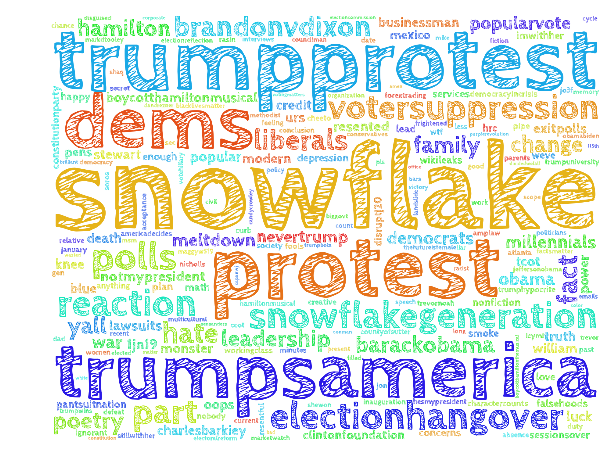

In [23]:
keywords = getKeywords(cleanedTweets)
makeWordCloud(keywords)

* 
    * We searched again to get more recent tweets. Clearly, people still have strong negative feelings on the election results, and it seems the emotitions are getting higher influnced by Jill Stein's request for a recount of the vote. 

In [24]:
searchCount = 2000
searchTerm = '#electionresults OR #electionfinalthoughts -RT'
startdate = '2016-11-21'
enddate = '2016-11-27'

tweetTexts = getTwitterData(searchTerm, searchCount, startdate, enddate)
cleanedTweets = getCleanedTweets(tweetTexts)

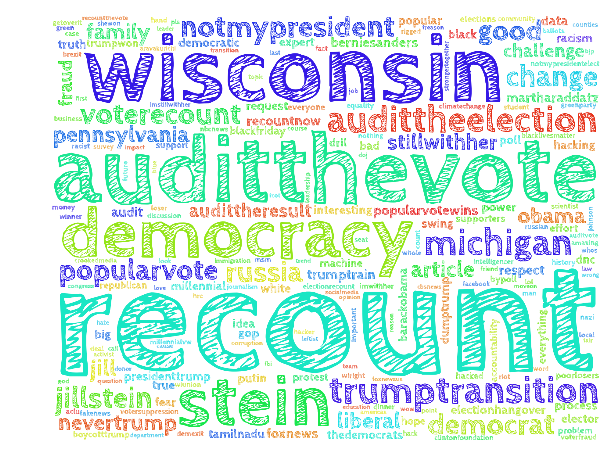

In [25]:
keywords = getKeywords(cleanedTweets)
makeWordCloud(keywords)

## Project Information

### * Project workflow

In [9]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "wf.jpeg")

### Analysis Process
1.Web crawling to obtain the data 

2.Twitter keyword analysis using wordcloud and keyword extractor libraries to catch people's feeling on the election results

3.Run Stepwise to select the important variables 

4.Correlation analysis to remove the redundant variables: shiny scatter plot, matplotlib charts to add linear regression lines, R correlation table 

5.Run Multiple regression analysis 

6.Cross validation and compare real support rates and test results to validate the models

7.Run Decision tree model to clarify the results

### Data Sources
- CNN, Twitter, census.gov, statsamerica.org, lgbtmap.org, kff.org, mongabay.com

### Methods that we used:
- Statistical analysis : R:MASS,agricolae, python:tweepy,pandas, numpy, sklearn, matplotlib, seaborn…
- Charts, visualization : Python:matplotlib, seaborn; R Shiny

### Project plan (Schedule for each member, Presentation organization):
https://docs.google.com/document/d/1nu4zwsOvo-WEMqwXltLCnwS9bn-pIlC9iH71ctP784Q/edit

# 2.Analysis 

## 2.2. Web Scraping

In this part we will scraped the data of election results among states and do some analysis with them. 

We first used a web crawler to save web page contents of cnn.com into a json file using python. And then we loaded the json file contents to do filter what we needed. We saved the contents we wanted into seperate lists and then combined them into a dataframe. 

In [40]:
#national result 
def getElecData(link):
    import requests
    import re
    import json
    import locale
    locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )
    
    res = requests.get(link)
    data = res.json()
    with open('results.json', 'w') as f: #put the file in a json file 
        json.dump(data, f)
    
    with open('results.json', 'r') as f: #load the contents of the json file
        data2 = json.load(f)
    
    tn = float(data2['candidates'][0]['pctDecimal'])
    cn = float(data2['candidates'][1]['pctDecimal'])
    result_nation = (tn,cn)

#State Name
    state = []
    tru_per = []
    hil_per = []
    tru_cvote = []
    hil_cvote = []
    for i in range(0,52):
        state.append(data2['races'][i]['state'])
        if data2['races'][i]['candidates'][0]['lname'] == 'Trump':
            tru_per.append(float(data2['races'][i]['candidates'][0]['pctDecimal']))
            hil_per.append(float(data2['races'][i]['candidates'][1]['pctDecimal']))
            tru_cvote.append(locale.atoi(data2['races'][i]['candidates'][0]['cvotes']))
            hil_cvote.append(locale.atoi(data2['races'][i]['candidates'][1]['cvotes']))
        else:
            tru_per.append(float(data2['races'][i]['candidates'][1]['pctDecimal']))
            hil_per.append(float(data2['races'][i]['candidates'][0]['pctDecimal']))
            tru_cvote.append(locale.atoi(data2['races'][i]['candidates'][1]['cvotes']))
            hil_cvote.append(locale.atoi(data2['races'][i]['candidates'][0]['cvotes']))
            
    import pandas as pd
    df = pd.DataFrame()
    
    df['State'] = state
    df['Trump percentage'] = tru_per 
    df['Hillary percentage'] = hil_per 
    df['Trump number of votes'] = tru_cvote
    df['Hillary number of votes'] = hil_cvote

    df.to_csv('election_result.csv')
    
    return df

In [41]:
link = 'http://data.cnn.com/ELECTION/2016/full/P.full.json'
getElecData(link)

,State,Trump percentage,Hillary percentage,Trump number of votes,Hillary number of votes
0,UNITED STATES,46.5,48.1,62352375,64429062
1,Alabama,62.9,34.6,1306925,718084
2,Alaska,52.9,37.7,130415,93007
3,Arizona,49.5,45.4,1021154,936250
4,Arkansas,60.4,33.8,677904,378729
5,California,32.8,61.6,3916209,7362490
6,Colorado,44.4,47.3,1137455,1212209
7,Connecticut,41.2,54.5,668266,884432
8,Delaware,41.9,53.4,185103,235581
9,Dist. of Columbia,4.1,92.8,11553,260223


## 2.3. Examine the data

read the data csv using pandas

In [12]:
import pandas as pd
data=pd.read_csv("Election.csv")
data.head(1)

,State,Trump_percentage,Hillary_percentage,Trump_number_of_votes,Hillary_number_of_votes,Income,GDP,Unemployment_Rate,Education_Level,White_Ratio,M_to_F_Index,LGBT_Adult
0,Alabama,62.9,34.6,1306925,718084,38030,207248,5.4,24.2,65,94.33,2.8


we perform seaborn to draw pairwise linear relationship of variables, x_vars are the independent variables and y_vars are the dependent ones.

In [13]:
!pip install seaborn

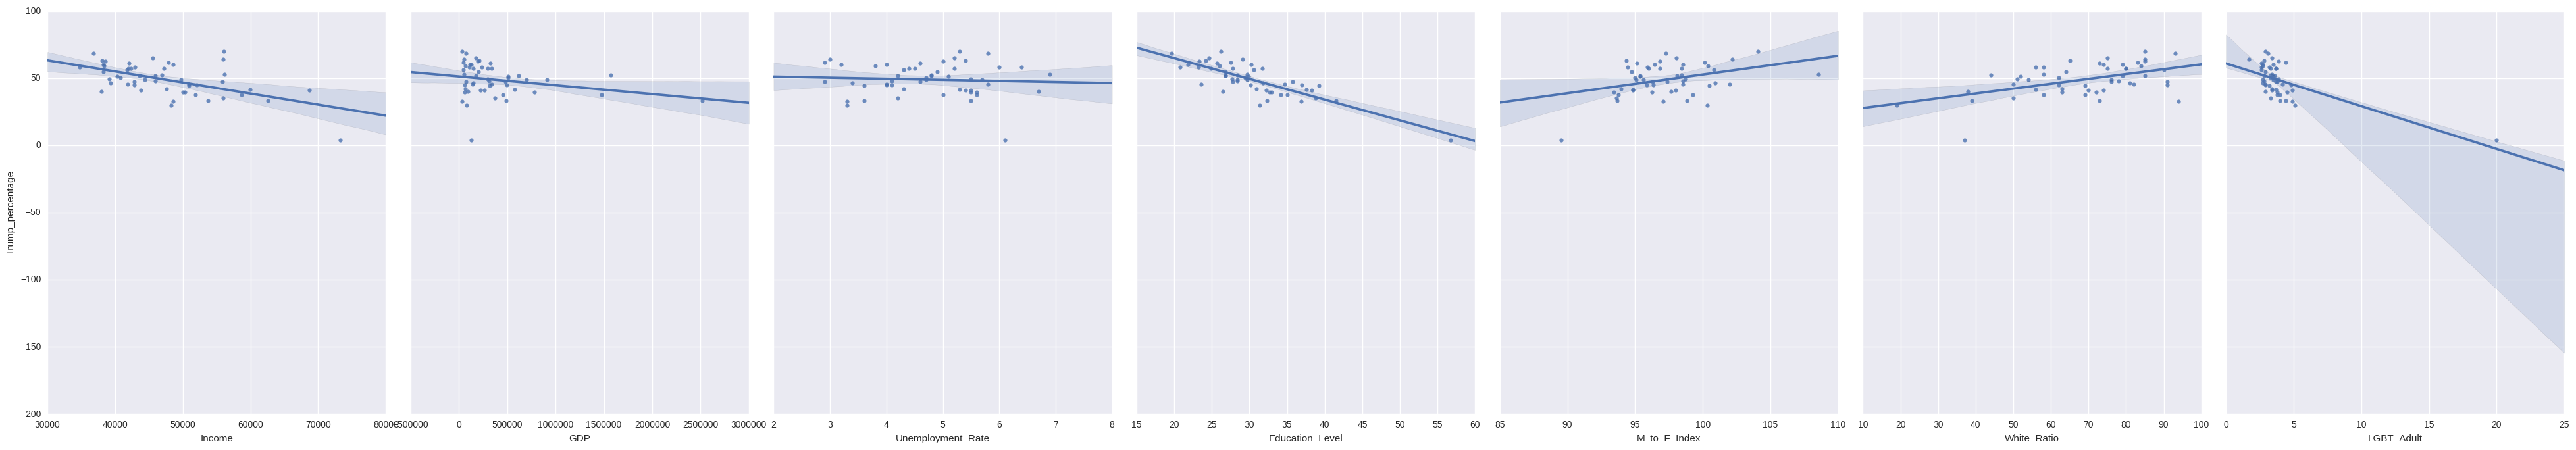

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data,x_vars=["Income","GDP","Unemployment_Rate","Education_Level","M_to_F_Index","White_Ratio","LGBT_Adult"],
             y_vars="Trump_percentage",size=7,aspect=0.8,kind="reg")
plt.show()

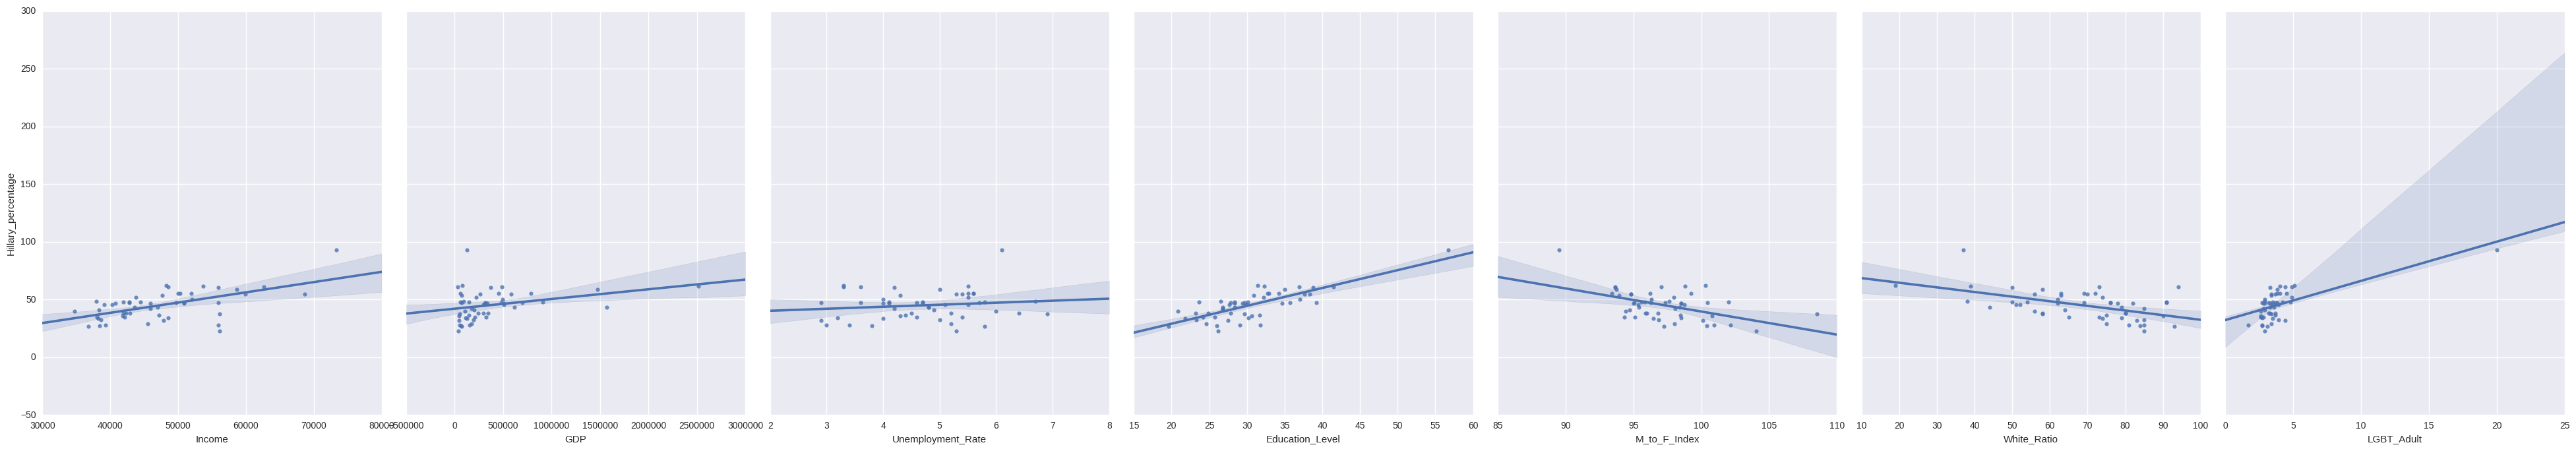

In [15]:
sns.pairplot(data,x_vars=["Income","GDP","Unemployment_Rate","Education_Level","M_to_F_Index","White_Ratio","LGBT_Adult"],
             y_vars="Hillary_percentage",size=7,aspect=0.8,kind="reg")
plt.show()

## 2.4. Multiple Regression Analysis (R)

* This is our main analysis part. (Please see /codes/R codes/Finalproject.R)

## 2.5. cross validation

First, we perform sklearn to seperate the data radomly into two parts, one train dataset which is used to build the model here, one test data which are left to do the prediction. 

In [32]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [33]:
X=data[["Education_Level","White_Ratio","LGBT_Adult"]]
Y=data[["Trump_percentage"]]
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=1)
Y_test.shape

(13, 1)

Our test dataset remains to a size of 13.

Then we perform multi-regression here with our train data, and show the summary of the model.compute the Root-mean-square deviation to see how good the predictction is and draw a plot to compare the predicted value and real value of support rate of Trump.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 73.91754286]
[[-1.25153234  0.22141301 -0.59743438]]
RMSE: [ 5.43813179]


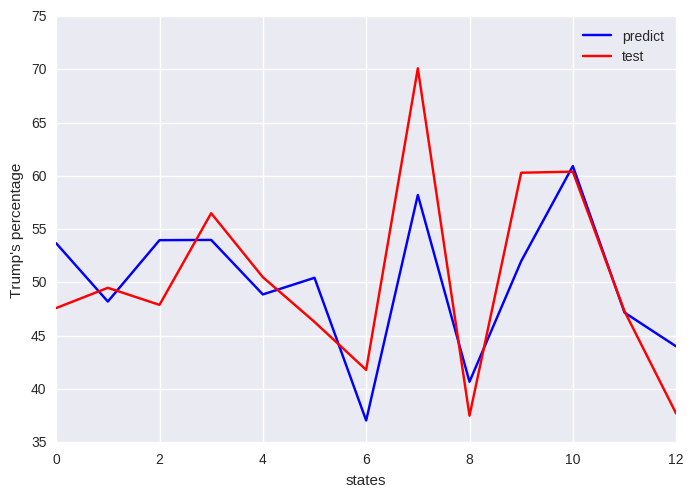

In [34]:
Reg=LinearRegression()
model=Reg.fit(X_train,Y_train)
print(model)
print (Reg.intercept_)
print (Reg.coef_)
Y_pred=Reg.predict(X_test)
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Y_test.values[i])**2
    sum_erro=np.sqrt(sum_mean/13)
print ("RMSE:",sum_erro)
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,"b",label="predict")
plt.plot(range(len(Y_pred)),Y_test, "r", label="test")
plt.legend(loc="upper right")
plt.xlabel("states")
plt.ylabel("Trump's percentage")
plt.show()

Do the same for Clinton.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 97.99582557]
[[ 1.15029294 -0.24211814 -0.75101413  0.53790007]]
RMSE: [ 17.65803706]


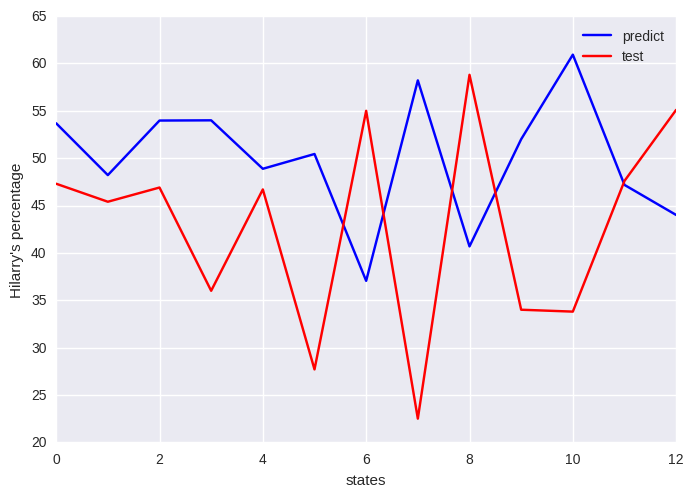

In [35]:
Xh=data[["Education_Level","White_Ratio","M_to_F_Index","LGBT_Adult"]]
Yh=data[["Hillary_percentage"]]
Xh_train, Xh_test, Yh_train, Yh_test=train_test_split(Xh,Yh,random_state=1)
Reg=LinearRegression()
model=Reg.fit(Xh_train,Yh_train)
print(model)
print (Reg.intercept_)
print (Reg.coef_)
Yh_pred=Reg.predict(Xh_test)
sum_mean=0
for i in range(len(Y_pred)):
    sum_mean+=(Y_pred[i]-Yh_test.values[i])**2
    sum_erro=np.sqrt(sum_mean/13)
print ("RMSE:",sum_erro)
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,"b",label="predict")
plt.plot(range(len(Y_pred)),Yh_test, "r", label="test")
plt.legend(loc="upper right")
plt.xlabel("states")
plt.ylabel("Hilarry's percentage")
plt.show()

# 3. Conclusion

We were able to obtain a regression model of all the relevant independent variables that we examined. Additionally, we were able to see which variables had the most significant impacts on the election and what they meant in terms of the support rate for each of the candidates.The two most significant variables that we found were education level and the ratio of white people in each state. We were able to determine that higher education levels and a lower ratio of white people was correlated with a higher support rate for Clinton and a lower support rate for Trump and the exact opposite also held true. We were further able to visualize these trends using the visualization tools of mapping and shiny. Here we were able to better examine these trends of each independent variable and see their correlation with the support rate of each candidate.

## Decision Trees

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "Decision Trees1.jpg")

In [30]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "Decision Trees2.jpg")

## Mapping

We imported the plotly module and made a heatmap of the election result. The states in blue support Hillary while states in red support Trump. And the shades of the color represent the support rate in the state.

In [3]:
import plotly.plotly as py
import pandas as pd

py.sign_in('muffin12','9YuiSSWyBzXLWgtinreB')
from plotly.graph_objs import *

df = pd.read_csv('election_result.csv')
for col in df.columns:
    df[col] = df[col].astype(str)
    
df1 = pd.read_csv('election_result1.csv')
for col in df1.columns:
    df1[col] = df1[col].astype(str)

df['text'] = df['State'] + '<br>' +\
    'Trump '+df['Trump percentage']+' Hillary '+df['Hillary percentage']+'<br>'+\
    'Trump_votes '+df['Trump number of votes']+' Hillary_votes ' + df['Hillary number of votes']
    
df1['text'] = df1['State'] + '<br>' +\
    'Trump '+df1['Trump percentage']+' Hillary '+df1['Hillary percentage']+'<br>'+\
    'Trump_votes '+df1['Trump number of votes']+' Hillary_votes ' + df1['Hillary number of votes']

trace1 = Choropleth(
    z=df1['Hillary percentage'].astype(float),
    autocolorscale=False,
    locations = df1['code'],
    colorscale=[[0.0, 'rgb(100,149,237)'],[0.25, 'rgb(0,0,205)'],[0.5, 'rgb(0,0,139)'],\
            [0.75, 'rgb(25,25,112)'],[1.0, 'rgb(72,61,139)']],
    hoverinfo='text',
    locationmode='USA-states',
    name='Clinton',
    showscale=False,
    text = df1['text'],
    marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) )
)


trace2 = Choropleth(
    z= df['Trump percentage'].astype(float),
    autocolorscale=False,
    locations = df['code'],
    colorscale = [[0.0, 'rgb(250,128,114)'], [0.25, 'rgb(255,99,71)'],[0.5, 'rgb(255,0,0)'],\
            [0.75, 'rgb(165,42,42)'],[1, 'rgb(128,0,0)']],
    hoverinfo='text',
    locationmode='USA-states',
    name='Trump',
    showscale=False,
    text = df['text'],
    marker = dict(line = dict (
                color = 'rgb(255,255,255)',
                width = 2))
        )  

data = Data([trace1, trace2])

layout = Layout(
    autosize=False,
    
    geo=dict(
        countrycolor='rgb(102, 102, 102)',
        countrywidth=0.1,
        lonaxis=dict(
            gridwidth=1.5999999999999999,
            range=[-180, -50],
            showgrid=False
        ),
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showland=False,
        showrivers=False,
        showsubunits=True,
        subunitcolor='rgb(102, 102, 102)',
        subunitwidth=0.5
    ),
    hovermode='closest',
    
    
    
    images=list([
        dict(
            x=1,
            y=0.6,
            sizex=0.155,
            sizey=0.4,
            xanchor='right',
            xref='paper',
            yanchor='bottom',
            yref='paper'
        )
    ]),
    showlegend=True,
    title='<b>Election Result 2016</b>',
    width= 800,
    margin = dict(
        l=0,
        r=12.5,
        b=25,
        t=25,
        pad=4)
)


fig = dict( data=data, layout=layout )
py.iplot( fig, filename='election-result-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~muffin12/0 or inside your plot.ly account where it is named 'election-result-map'


## Shiny (R)

* With the balloon chart programmed with R Shiny, we want to see and show people the relationship between the supporting rate and each independent variable more intuitively. (Please see /code/R codes/global.R, ui.R, server.R)
* On the balloon chart, each balloon means each state, and the size of the balloons are the number of the electoral votes for each state, and each color of the balloons mean the regions where each state is located. We could see from here the relationship between the variables including more information, the electoral votes and the regions, as well as that our regression analysis results are pretty significant. 



## Regression Analysis Results

In [26]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "Regression_Results1.jpg")

In [27]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "Regression_Results2.jpg")